<a href="https://colab.research.google.com/github/KUSHAL67F4/OIBSIP/blob/main/Oasis_Infobyte_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Load the dataset
import pandas as pd

df = pd.read_csv('Advertising.csv')

In [2]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.shape

(200, 5)

In [4]:
print("Number of rows: ",df.shape[0])

Number of rows:  200


In [5]:
print("Number of Columns: ",df.shape[1])

Number of Columns:  5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Mean Squared Error: 3.1740973539761033
R-squared Score: 0.899438024100912


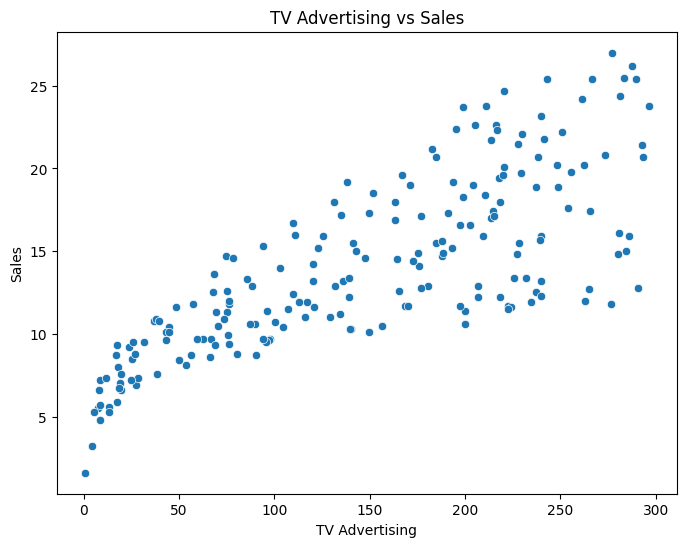

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


feature_cols = ['TV', 'Radio', 'Newspaper']
X = df[feature_cols]
y = df['Sales']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Scatter plot of TV advertising versus sales
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='TV', y='Sales')
plt.xlabel('TV Advertising')
plt.ylabel('Sales')
plt.title('TV Advertising vs Sales')
plt.show()

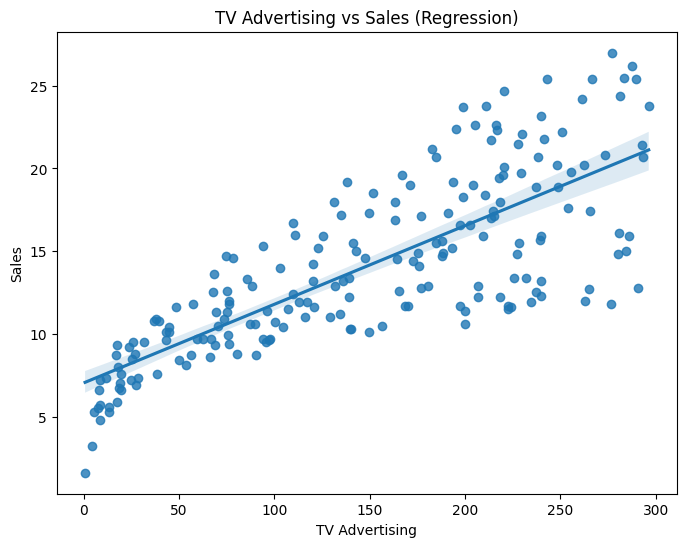

In [10]:
# Regression plot of TV advertising versus sales
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='TV', y='Sales')
plt.xlabel('TV Advertising')
plt.ylabel('Sales')
plt.title('TV Advertising vs Sales (Regression)')
plt.show()

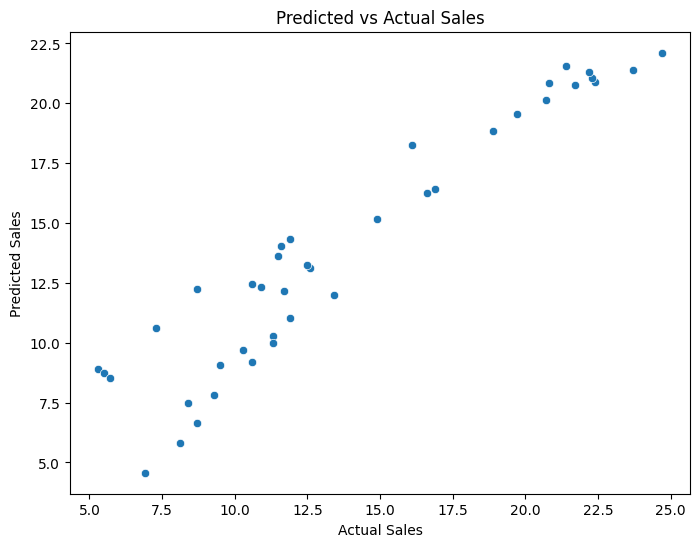

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Predicted vs Actual Sales')
plt.show()

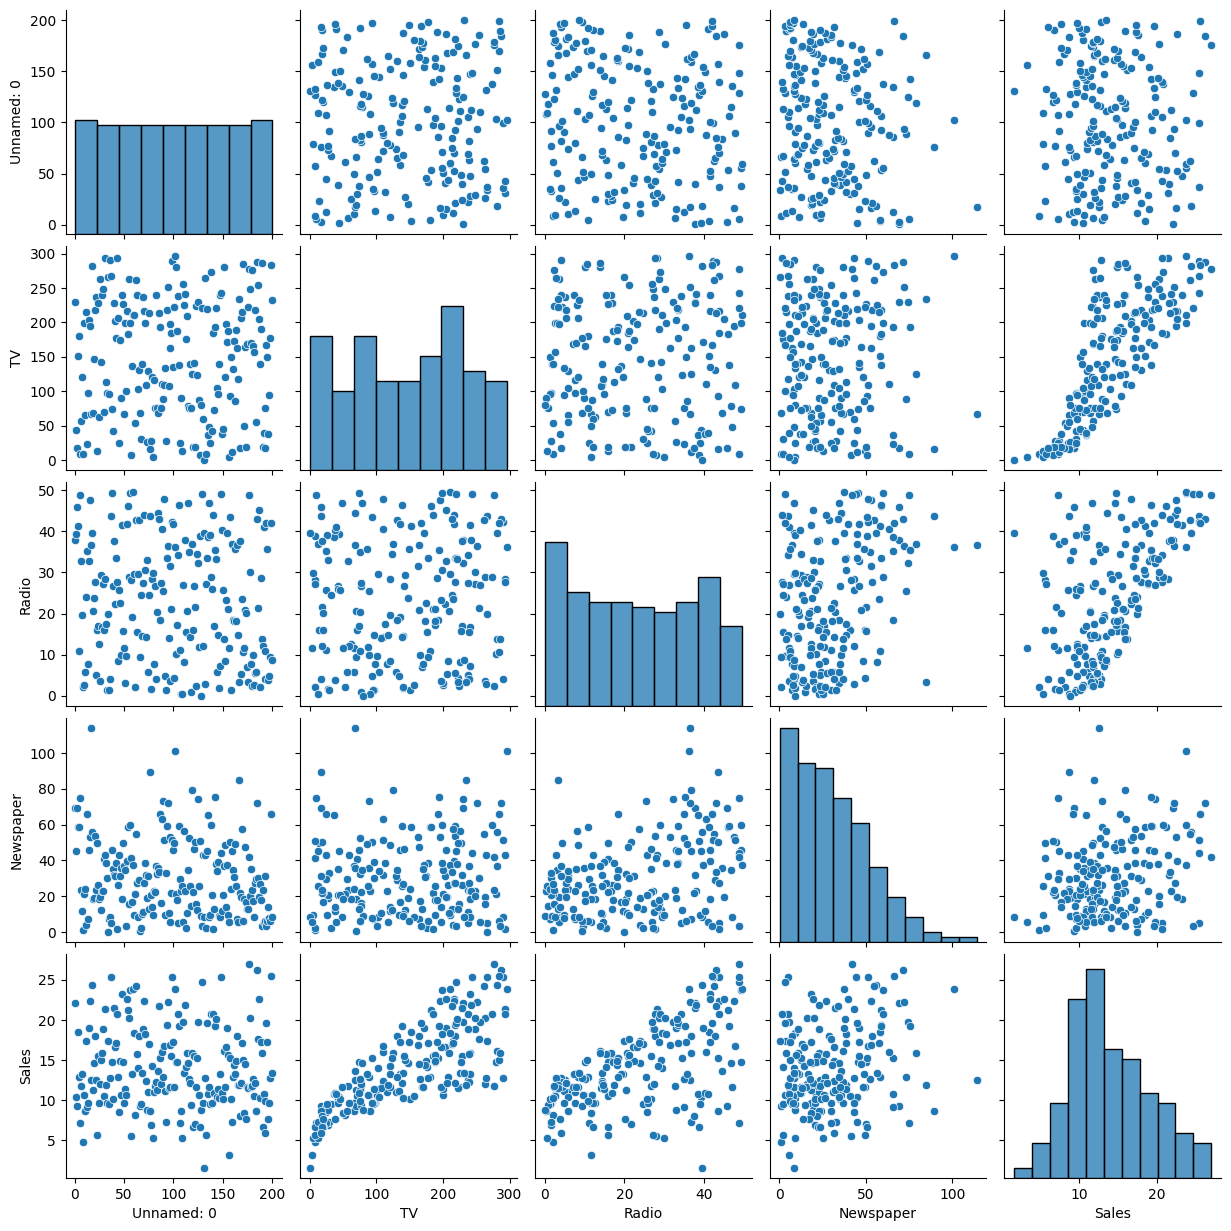

In [12]:
sns.pairplot(df)
plt.show()

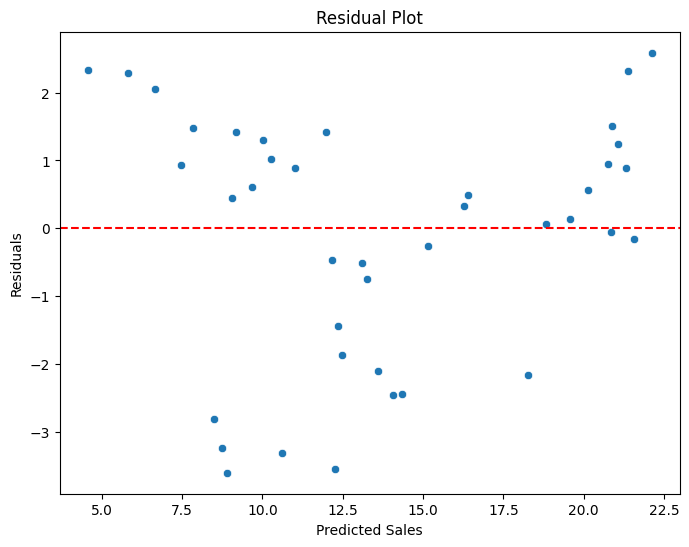

In [13]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

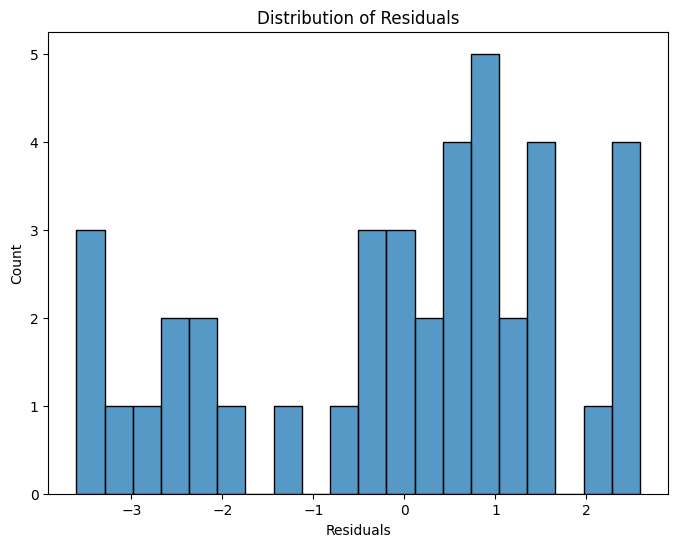

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Distribution of Residuals')
plt.show()

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

df.dropna(inplace=True)

# Split the dataset into features (X) and target variable (y)
X = df.drop('Sales', axis=1)
y = df['Sales']

# Feature engineering
# Create polynomial features
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a random forest regressor
model = RandomForestRegressor(random_state=42)

# Perform grid search for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
model = grid_search.best_estimator_

# Perform cross-validation
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the cross-validation RMSE scores, mean RMSE, and R-squared
print("Cross-Validation RMSE scores:", cv_rmse_scores)
print("Mean RMSE:", np.mean(cv_rmse_scores))
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r2)


Cross-Validation RMSE scores: [0.67390852 0.60233545 0.54363333 0.82960756 0.59689161]
Mean RMSE: 0.6492752969494769
Root Mean Squared Error (RMSE): 0.5170191485815595
R-squared: 0.9915311037736316


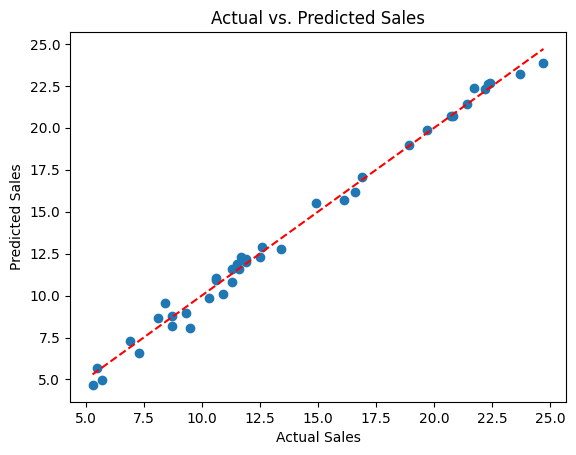

In [18]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()